# Parallel Coordinate Plot: Real Case Example -- Mean Climate (CMIP5 & 6)

- Generate a static image of Parallel coordinate plot using Matplotlib, for mean climate metrics.
- Author: Jiwoo Lee
- Last update: 2022.04

## 1. Read data from JSON files

Input data for parallel coordinate plot is expected as a set a (stacked or list of) 2-d numpy array(s) with list of strings for x and y axes labels. 

### 1.1 Provide PMP output JSON files

In [1]:
import glob
import os
import numpy as np
import requests
import pandas as pd

PMP output files downloadable from the [PMP results archive](https://github.com/PCMDI/pcmdi_metrics_results_archive). 

In [2]:
vars = ['pr', 'prw', 'psl', 'rlds', 'rltcre', 'rlus', 'rlut', 'rlutcs', 'rsds', 'rsdscs', 'rsdt', 'rstcre', 'rsut', 'rsutcs', 'sfcWind', 
        'ta-200', 'ta-850', 'tas', 'tauu', 'ts', 'ua-200', 'ua-850', 'va-200', 'va-850', 'zg-500']

In [3]:
json_dir = './json_files'
os.makedirs(json_dir, exist_ok=True)

In [4]:
mip = "cmip6"
exp = "historical"
data_version = "v20210811"

In [5]:
for var in vars:
    url = "https://raw.githubusercontent.com/PCMDI/pcmdi_metrics_results_archive/main/" + \
          "metrics_results/mean_climate/"+mip+"/"+exp+"/"+data_version+"/"+var+"."+mip+"."+exp+".regrid2.2p5x2p5."+data_version+".json"
    try:
        r = requests.get(url, allow_redirects=True)
        r.raise_for_status()
        filename = os.path.join(json_dir, url.split('/')[-1])
        if os.path.exists(filename):
            pass
        else:
            with open(filename, 'wb') as file:
                file.write(r.content)
            print('Download completed:', filename)
    except:
        print(var, 'not exist')
        pass

In [6]:
mip = "cmip5"
exp = "historical"
data_version = "v20200429"

In [7]:
for var in vars:
    url = "https://raw.githubusercontent.com/PCMDI/pcmdi_metrics_results_archive/main/" + \
          "metrics_results/mean_climate/"+mip+"/"+exp+"/"+data_version+"/"+var+"."+mip+"."+exp+".regrid2.2p5x2p5."+data_version+".json"
    try:
        r = requests.get(url, allow_redirects=True)
        r.raise_for_status()
        filename = os.path.join(json_dir, url.split('/')[-1])
        if os.path.exists(filename):
            pass
        else:
            with open(filename, 'wb') as file:
                file.write(r.content)
            print('Download completed:', filename)
    except:
        print(var, 'not exist')
        pass

prw not exist
rsdscs not exist
ts not exist


Check JSON files

In [8]:
json_list_1 = sorted(glob.glob(os.path.join(json_dir, '*.cmip5.' + exp + '*' + '.json')))
json_list_2 = sorted(glob.glob(os.path.join(json_dir, '*.cmip6.' + exp + '*' + '.json')))
for i, json_file in enumerate(json_list_1):
    print(i+1, json_file.split('/')[-1])
for i, json_file in enumerate(json_list_2):
    print(i+1, json_file.split('/')[-1])

1 pr.cmip5.historical.regrid2.2p5x2p5.v20200429.json
2 psl.cmip5.historical.regrid2.2p5x2p5.v20200429.json
3 rlds.cmip5.historical.regrid2.2p5x2p5.v20200429.json
4 rltcre.cmip5.historical.regrid2.2p5x2p5.v20200429.json
5 rlus.cmip5.historical.regrid2.2p5x2p5.v20200429.json
6 rlut.cmip5.historical.regrid2.2p5x2p5.v20200429.json
7 rlutcs.cmip5.historical.regrid2.2p5x2p5.v20200429.json
8 rsds.cmip5.historical.regrid2.2p5x2p5.v20200429.json
9 rsdt.cmip5.historical.regrid2.2p5x2p5.v20200429.json
10 rstcre.cmip5.historical.regrid2.2p5x2p5.v20200429.json
11 rsut.cmip5.historical.regrid2.2p5x2p5.v20200429.json
12 rsutcs.cmip5.historical.regrid2.2p5x2p5.v20200429.json
13 sfcWind.cmip5.historical.regrid2.2p5x2p5.v20200429.json
14 ta-200.cmip5.historical.regrid2.2p5x2p5.v20200429.json
15 ta-850.cmip5.historical.regrid2.2p5x2p5.v20200429.json
16 tas.cmip5.historical.regrid2.2p5x2p5.v20200429.json
17 tauu.cmip5.historical.regrid2.2p5x2p5.v20200429.json
18 ua-200.cmip5.historical.regrid2.2p5x2p5.v20

### 1.2 Extract data from JSON files

Use `read_mean_clim_json_files` function to extract data from the above JSON files.

#### Parameters
- `json_list`: list of string, where each element is for path/file for PMP output JSON files
- `stats`: list of string, where each element is statistic to extract from the JSON.  Optional
- `regions`: list of string, where each element is region to extract from the JSON.  Optional
- `mip`: string, category for mip, e.g., 'cmip6'.  Optional
- `debug`: bool, default=False, enable few print statements to help debug

#### Returns
- `df_dict`: dictionary that has `[stat][season][region]` hierarchy structure storing pandas dataframe for metric numbers (Rows: models, Columns: variables (i.e., 2d array)
- `var_list`: list of string, all variables from JSON files
- `var_unit_list`: list of string, all variables and its units from JSON files
- `regions`: list of string, regions
- `stats`: list of string, statistics

In [9]:
from pcmdi_metrics.graphics import read_mean_clim_json_files

In [10]:
df_dict_1, var_list_1, var_unit_list_1, regions_1, stats_1 = read_mean_clim_json_files(
    json_list_1, mip="cmip5")

In [11]:
df_dict_2, var_list_2, var_unit_list_2, regions_2, stats_2 = read_mean_clim_json_files(
    json_list_2, mip="cmip6")

In [12]:
print('var_list_1:', var_list_1)
print('var_unit_list_1:', var_unit_list_1)

var_list_1: ['pr', 'psl', 'rlds', 'rltcre', 'rlus', 'rlut', 'rlutcs', 'rsds', 'rsdt', 'rstcre', 'rsut', 'rsutcs', 'sfcWind', 'ta-200', 'ta-850', 'tas', 'tauu', 'ua-200', 'ua-850', 'va-200', 'va-850', 'zg-500']
var_unit_list_1: ['pr [kg m-2 s-1]', 'psl [Pa]', 'rlds [W m-2]', 'rltcre [W m-2]', 'rlus [W m-2]', 'rlut [W m-2]', 'rlutcs [W m-2]', 'rsds [W m-2]', 'rsdt [W m-2]', 'rstcre [W m-2]', 'rsut [W m-2]', 'rsutcs [W m-2]', 'sfcWind [m s-1]', 'ta-200 [K]', 'ta-850 [K]', 'tas [K]', 'tauu [Pa]', 'ua-200 [m s-1]', 'ua-850 [m s-1]', 'va-200 [m s-1]', 'va-850 [m s-1]', 'zg-500 [m]']


In [13]:
print('var_list_2:', var_list_2)
print('var_unit_list_2:', var_unit_list_2)

var_list_2: ['pr', 'prw', 'psl', 'rlds', 'rltcre', 'rlus', 'rlut', 'rlutcs', 'rsds', 'rsdscs', 'rsdt', 'rstcre', 'rsut', 'rsutcs', 'sfcWind', 'ta-200', 'ta-850', 'tas', 'tauu', 'ts', 'ua-200', 'ua-850', 'va-200', 'va-850', 'zg-500']
var_unit_list_2: ['pr [N/A]', 'prw [N/A]', 'psl [N/A]', 'rlds [N/A]', 'rltcre [W m-2]', 'rlus [N/A]', 'rlut [N/A]', 'rlutcs [N/A]', 'rsds [N/A]', 'rsdscs [N/A]', 'rsdt [N/A]', 'rstcre [W m-2]', 'rsut [N/A]', 'rsutcs [N/A]', 'sfcWind [N/A]', 'ta-200 [N/A]', 'ta-850 [N/A]', 'tas [N/A]', 'tauu [N/A]', 'ts [N/A]', 'ua-200 [N/A]', 'ua-850 [N/A]', 'va-200 [N/A]', 'va-850 [N/A]', 'zg-500 [N/A]']


In [14]:
def common_member(a, b):   
    a_set = set(a)
    b_set = set(b)
     
    # check length
    if len(a_set.intersection(b_set)) > 0:
        return(list(a_set.intersection(b_set)))
    else:
        return("no common elements")

In [15]:
var_list = sorted(common_member(var_list_1, var_list_2))
var_list.remove('sfcWind')
var_list.remove('ta-850')
var_list.remove('ua-850')
var_list.remove('ua-200')
var_list.remove('va-850')
var_list.remove('va-200')
var_list.remove('tauu')
print(var_list)
print(len(var_list))

['pr', 'psl', 'rlds', 'rltcre', 'rlus', 'rlut', 'rlutcs', 'rsds', 'rsdt', 'rstcre', 'rsut', 'rsutcs', 'ta-200', 'tas', 'zg-500']
15


In [16]:
comp_list = ['mip', 'model', 'run'] + var_list

In [17]:
data_df = pd.concat([df_dict_1['rms_xyt']['ann']['global'][comp_list], df_dict_2['rms_xyt']['ann']['global'][comp_list]], axis=0)

In [18]:
season = 'ann'
stat = 'rms_xyt'
selected_models = ['ACCESS', 'BCC', 'CESM', 'Can', 'FGOALS', 'FIO-ESM', 'GFDL', 'IPSL', 'MIROC', 'MPI', 'MRI', 'NorESM']


def selected_models_only(df, selected_models):
    # Selected models only
    model_names = df['model'].tolist()
    for model_name in model_names:
        drop_model = True
        for keyword in selected_models:
            if keyword in model_name:
                drop_model = False
                break
        if drop_model:
            df.drop(df.loc[df['model']==model_name].index, inplace=True)
    return df


# Selected models only
df_dict_1[stat][season]['global'] = selected_models_only(df_dict_1[stat][season]['global'], selected_models)
df_dict_2[stat][season]['global'] = selected_models_only(df_dict_2[stat][season]['global'], selected_models)
    
# mean value of statistics from multi models in each CMIP
df_dict_1[stat][season]['global'].loc['mean'] = df_dict_1[stat][season]['global'].mean(numeric_only=True, skipna=True)
df_dict_2[stat][season]['global'].loc['mean'] = df_dict_2[stat][season]['global'].mean(numeric_only=True, skipna=True)

df_dict_1[stat][season]['global'].at['mean', 'model'] = 'CMIP5 mean'
df_dict_2[stat][season]['global'].at['mean', 'model'] = 'CMIP6 mean'

# merge dataframes
data_df = pd.concat([df_dict_1[stat][season]['global'][comp_list], df_dict_2[stat][season]['global'][comp_list]], axis=0)

# reorder to have each mean at the end (bottom row) of the dataframe
df_mean = data_df.loc['mean']
df_mean_dropped = data_df.drop(index='mean')
df_reordered = df_mean_dropped.append(df_mean)
data_df = df_reordered

In [19]:
data = data_df[var_list].to_numpy()
model_names = data_df['model'].tolist()
metric_names = var_list
#model_highlights = ['E3SM-1-0', 'E3SM-1-1', 'E3SM-1-1-ECA']
model_highlights = ['CMIP5 mean', 'CMIP6 mean']
print('data.shape:', data.shape)
print('len(metric_names): ', len(metric_names))
print('len(model_names): ', len(model_names))

data.shape: (46, 15)
len(metric_names):  15
len(model_names):  46


In [20]:
units_all = 'prw [kg m-2], pr [mm d-1], psl [Pa], rlds [W m-2], rsdscs [W m-2], rltcre [W m-2], rlus [W m-2], rlut [W m-2], rlutcs [W m-2], rsds [W m-2], rsdt [W m-2], rstcre [W m-2], rsus [W m-2], rsut [W m-2], rsutcs [W m-2], sfcWind [m s-1], zg-500 [m], ta-200 [K], ta-850 [K], tas [K], ts [K], ua-200 [m s-1], ua-850 [m s-1], uas [m s-1], va-200 [m s-1], va-850 [m s-1], vas [m s-1], tauu [Pa]'
units_all.split(', ')
var_unit_list = [] 

for var in var_list:
    found = False
    for var_units in units_all.split(', '):
        tmp1 = var_units.split(' [')[0]
        #print(var, tmp1)
        if tmp1 == var:
            unit = '[' + var_units.split(' [')[1]
            var_unit_list.append(var + '\n' + unit)
            found = True
            break
    if found is False:
        print(var, 'not found')

print('var_unit_list:', var_unit_list)

metric_names = var_unit_list

var_unit_list: ['pr\n[mm d-1]', 'psl\n[Pa]', 'rlds\n[W m-2]', 'rltcre\n[W m-2]', 'rlus\n[W m-2]', 'rlut\n[W m-2]', 'rlutcs\n[W m-2]', 'rsds\n[W m-2]', 'rsdt\n[W m-2]', 'rstcre\n[W m-2]', 'rsut\n[W m-2]', 'rsutcs\n[W m-2]', 'ta-200\n[K]', 'tas\n[K]', 'zg-500\n[m]']


## 2. Plot

In [21]:
from pcmdi_metrics.graphics import parallel_coordinate_plot

Parameters
----------
- `data`: 2-d numpy array for metrics
- `metric_names`: list, names of metrics for individual vertical axes (axis=1)
- `model_names`: list, name of models for markers/lines (axis=0)
- `model_highlights`: list, default=None, List of models to highlight as lines
- `fig`: `matplotlib.figure` instance to which the parallel coordinate plot is plotted.  If not provided, use current axes or create a new one.  Optional.
- `ax`: `matplotlib.axes.Axes` instance to which the parallel coordinate plot is plotted.  If not provided, use current axes or create a new one.  Optional.
- `figsize`: tuple (two numbers), default=(15,5), image size
- `show_boxplot`: bool, default=True, show box and wiskers plot
- `show_violin`: bool, default=True, show violin plot
- `title`: string, default=None, plot title
- `identify_all_models`: bool, default=True. Show and identify all models using markers
- `xtick_labelsize`: number, fontsize for x-axis tick labels (optional)
- `ytick_labelsize`: number, fontsize for x-axis tick labels (optional)
- `colormap`: string, default='viridis', matplotlib colormap
- `logo_rect`: sequence of float. The dimensions [left, bottom, width, height] of the new Axes. All quantities are in fractions of figure width and height.  Optional
- `logo_off`: bool, default=False, turn off PMP logo

Return
------
- `fig`: matplotlib component for figure
- `ax`: matplotlib component for axis

In [22]:
cmip6_models = df_dict_2[stat]['ann']['global']['model'].tolist()
cmip6_models

['ACCESS-CM2',
 'ACCESS-ESM1-5',
 'BCC-CSM2-MR',
 'BCC-ESM1',
 'CESM2',
 'CESM2-FV2',
 'CESM2-WACCM',
 'CESM2-WACCM-FV2',
 'CanESM5',
 'FGOALS-f3-L',
 'FGOALS-g3',
 'FIO-ESM-2-0',
 'GFDL-CM4',
 'GFDL-ESM4',
 'IPSL-CM6A-LR',
 'MIROC6',
 'MPI-ESM-1-2-HAM',
 'MPI-ESM1-2-HR',
 'MPI-ESM1-2-LR',
 'MRI-ESM2-0',
 'NorESM2-MM',
 'CMIP6 mean']

Passed a quick QC
Models in the second group: ['ACCESS-CM2', 'ACCESS-ESM1-5', 'BCC-CSM2-MR', 'BCC-ESM1', 'CESM2', 'CESM2-FV2', 'CESM2-WACCM', 'CESM2-WACCM-FV2', 'CanESM5', 'FGOALS-f3-L', 'FGOALS-g3', 'FIO-ESM-2-0', 'GFDL-CM4', 'GFDL-ESM4', 'IPSL-CM6A-LR', 'MIROC6', 'MPI-ESM-1-2-HAM', 'MPI-ESM1-2-HR', 'MPI-ESM1-2-LR', 'MRI-ESM2-0', 'NorESM2-MM', 'CMIP6 mean']


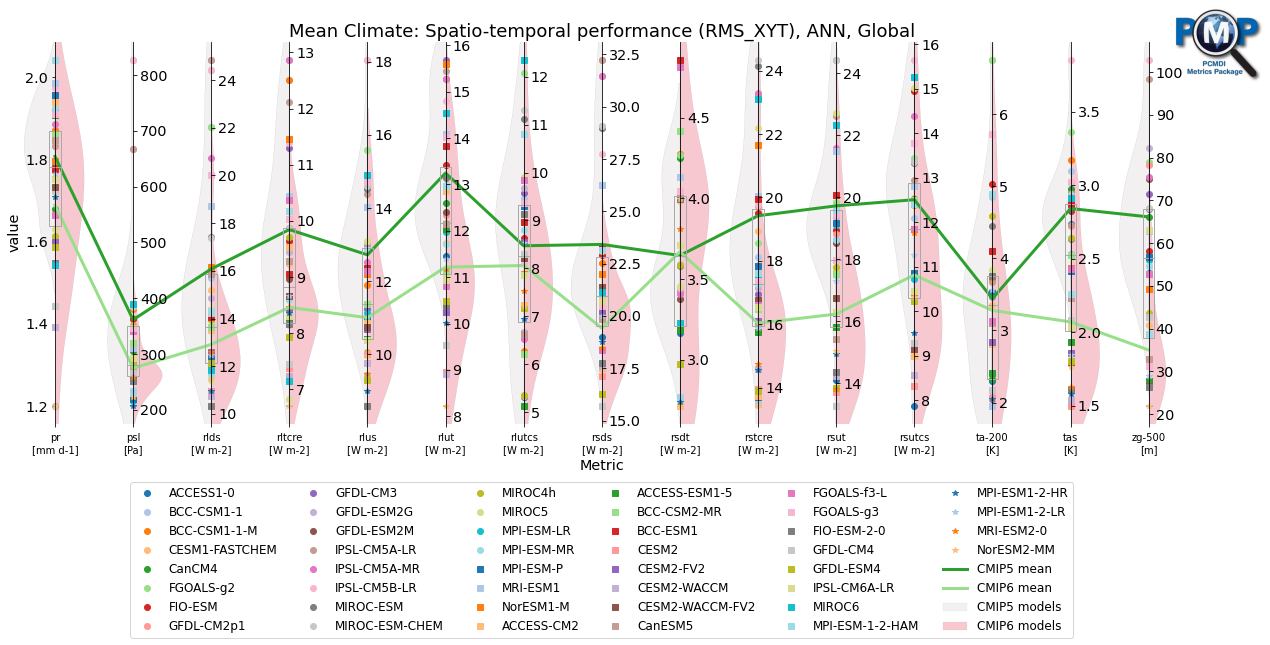

In [23]:
fig, ax = parallel_coordinate_plot(data, metric_names, model_names, model_highlights, 
                                   title='Mean Climate: Spatio-temporal performance (RMS_XYT), ANN, Global', 
                                   figsize=(21, 7),
                                   colormap='tab20',
                                   xtick_labelsize=10,
                                   logo_rect=[0.8, 0.8, 0.15, 0.15],
                                   model_names2=cmip6_models,
                                   group1_name='CMIP5 models',
                                   group2_name='CMIP6 models',                       
                                  )

In [24]:
# Save figure as an image file
fig.savefig('mean_clim_parallel_coordinate_plot_cmip56.png', facecolor='w', bbox_inches='tight')